/home/darshan/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Image loaded. Image shape:  (128, 128)


/home/darshan/miniconda3/envs/torch/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


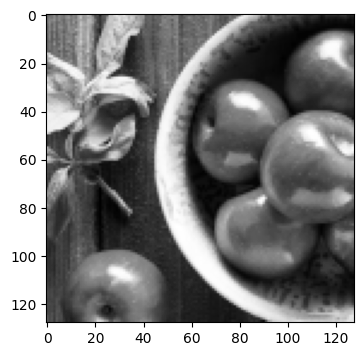

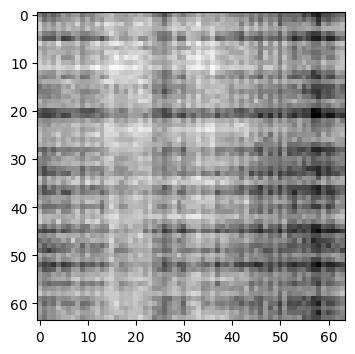

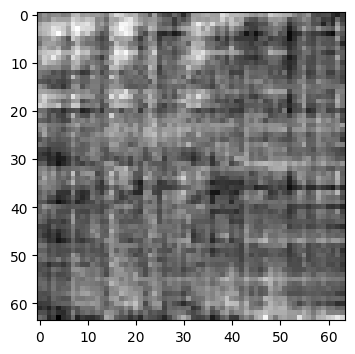

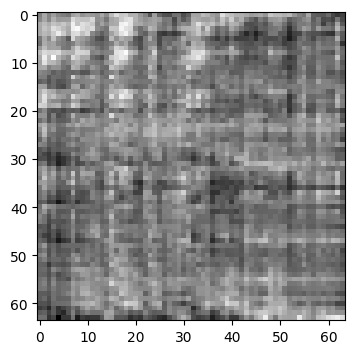

KeyboardInterrupt: 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
# import torchvision.transforms as transforms
from tqdm import tqdm
from dataset import ImageDataset
import os
import sys
# import numpy as np
from model import NeuPix
import utils
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4, 4]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# model params
dim = 30
input_size = 2 * (2 * dim)
output_size = 1
hidden_layers = [128] * 2
layers = [input_size] + hidden_layers + [output_size]

# training params
batch_size = (256)**2
num_epochs = 500
learning_rate = 0.005
image_path = os.path.join(os.path.abspath(''), 'data', 'apple_128.png')

train_dataset = ImageDataset(image_path)
utils.draw(train_dataset.get_image())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
train_dataset[0]

model = NeuPix(layers, dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        data = torch.reshape(data, (data.shape[0], -1))
        target = torch.reshape(target, (target.shape[0], 1))

        preds = model(data)

        loss = criterion(preds, target)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    if epoch % 100 == 0:
        utils.draw(utils.predict_image(model)

utils.check_accuracy(train_loader, model)
utils.draw(utils.predict_image(model))